#### AAVSO Lightcurve for AG DRa
https://www.aavso.org/LCGv2/index.htm?DateFormat=Calendar&RequestedBands=V,R,I,B&view=api.delim&ident=agdra&fromjd=2457894&tojd=2458504.578&delimiter=@@@

#### Link to ARAS page 
http://www.astrosurf.com/aras/Aras_DataBase/Symbiotics/AGDra.htm

_Importing modules and stuff_

In [1]:
import astropy.utils.data as aua
import astropy.io.fits as aif
import astropy.constants as const
import matplotlib.pyplot as pl
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import scipy as sp
import os
import pickle

_Define Object ARAS Website link and requirements for spectra._

In [2]:
rootsite = "http://www.astrosurf.com/aras/Aras_DataBase/Symbiotics/"
topic = "AGDra.htm"
minimal_resolution = 15000
minimal_wavelength_range = 2000
spectra_list_dump = "ag_dra.spectra_list.pckl"
spectra_data_dump = "ag_dra.data_dump.pckl"

_Method to scrap the ARAS page of the object of interest, looking for .fit files.
It returns a list with the .fit files addresses._

In [3]:
def download_list_spectra(rootsite, startname):
    site = "{}{}".format(rootsite, topic)
    print("Target site: {}".format(site))
    soup = BeautifulSoup(urlopen(site), "html")
    spectra_list = []
    for link in soup.findAll('a'):
        linkhref = link.get('href')
        if ".fit" in linkhref:
            spectrum_link = rootsite+linkhref if "http" not in linkhref else linkhref
            spectra_list.append(spectrum_link)
    print("Found {} .fit files".format(len(spectra_list)))
    return spectra_list

_Download each fit and save it into pickle file if resolution and wavelength range requirements are respected. If a pickle dump file is already existing in the current directory, nothing will be downloaded and the data will be loaded in memory_

In [4]:
spectra_list = download_list_spectra(rootsite, topic)
if not os.path.isfile(spectra_list_dump):
    print("Writing spectra list in file")
    with open(spectra_list_dump, 'wb') as output:
        pickle.dump(spectra_list, output)
else:
    spectra_list_from_dump = pickle.load(open(spectra_list_dump, "rb"))
    if len(set(spectra_list)) > len(set(spectra_list_from_dump)):
        print("Updating spectra list in file")
        with open(spectra_list_dump, 'wb') as output:
            pickle.dump(spectra_list, output)        

Target site: http://www.astrosurf.com/aras/Aras_DataBase/Symbiotics/AGDra.htm
Found 525 .fit files
Writing spectra list in file


_If no pickle data dump is found, each spectrum from the .fit list will be downloaded and exported to a data structure (data) if the resolution and wavelength range requirements are respected. The data structure will be then saved to file. If a pickle dump file is already existing in the current directory, nothing will be downloaded and the data will be loaded from the file in memory._

In [5]:
if not os.path.isfile(spectra_data_dump):
    print("No dump file found, downloading spectra...")
    data = []
    for link in spectra_list:
        try:
            hdul = aif.open(aua.download_file(link))
            hdr = hdul[0].header
            spectrum = hdul[0].data
        except:
            print("Broken file/link? {}".format(link))
            continue
        # calculate resolution of spectrum
        resolution = hdr['CRVAL1']/hdr['CDELT1']
        if resolution >= minimal_resolution:
            # derivate wavelength array            
            wavelengths = hdr['CDELT1']*np.arange(hdr['NAXIS1']) + hdr['CRVAL1']
            wavelength_range = wavelengths[-1] - wavelengths[0]
            if wavelength_range >= minimal_wavelength_range:
                data.append({"w" : wavelengths, "f" : spectrum, 
                             "do" : hdr['DATE-OBS'], "hdr" : hdr})
                print("Saving {}".format(link.split("/")[-1]))
                
    print("Saving {} spectra in total".format(len(data)))
    with open(spectra_data_dump, 'wb') as output:
        pickle.dump(data, output)
elif os.path.isfile(spectra_data_dump):
    print("Pickle dump {} found".format(spectra_data_dump))
    data = pickle.load(open(spectra_data_dump, "rb"))
    print("Loaded {} spectra".format(len(data)))

No dump file found, downloading spectra...


Saving asdb_agdra_20150411_984.fit
Saving asdb_agdra_20150412_820.fit
Saving asdb_agdra_20150413_835.fit
Saving asdb_agdra_20150413_973.fit
Saving asdb_agdra_20160416_907.fit
Saving asdb_agdra_20160418_831.fit
Saving asdb_agdra_20160423_890.fit
Saving asdb_agdra_20160427_852.fit
Saving asdb_agdra_20160428_859.fit
Saving asdb_agdra_20160429_856.fit
Saving asdb_agdra_20160501_846.fit
Saving asdb_agdra_20160503_853.fit
Saving asdb_agdra_20170329_864.fit
Saving asdb_agdra_20170402_044.fit
Saving asdb_agdra_20170402_890.fit
Saving asdb_agdra_20170405_833.fit
Saving asdb_agdra_20170406_823.fit
Saving asdb_agdra_20170407_937.fit
Saving asdb_agdra_20170411_822.fit
Saving asdb_agdra_20170412_885.fit
Saving asdb_agdra_20170423_910.fit
Saving asdb_agdra_20170418_878.fit
Saving asdb_agdra_20170419_829.fit
Saving asdb_agdra_20170423_839.fit
Saving asdb_agdra_20170423_910.fit
Saving asdb_agdra_20170426_847.fit
Saving asdb_agdra_20170428_888.fit
Saving asdb_agdra_20170513_843.fit
Saving asdb_agdra_20

Saving asdb_agdra_20180804_931.fit
Saving asdb_agdra_20180821_848.fit
Saving asdb_agdra_20180823_047.fit
Saving asdb_agdra_20180928_770.fit
Saving asdb_agdra_20181012_760.fit
Saving asdb_agdra_20181019_779.fit
Saving asdb_agdra_20190227_121.fit
Saving asdb_agdra_20190313_257.fit
Saving asdb_agdra_20190322_877.fit
Saving asdb_agdra_20190323_875.fit
Saving asdb_agdra_20190323_986.fit
Saving asdb_agdra_20190324_198.fit
Saving asdb_agdra_20190324_198.fit
Saving asdb_agdra_20190324_973.fit
Saving asdb_agdra_20190325_972.fit
Saving asdb_agdra_20190327_988.fit
Saving asdb_agdra_20190328_868.fit
Broken file/link? http://www.astrosurf.com/aras/Aras_DataBase/Symbiotics/FitFiles/asdb_agdra_20190330_129.fit
Saving 135 spectra in total


_Some helpful methods_

**calculate_velocity**: returns the velocity array (in km/s) with respect to a specific wavlength _wl_

**linelabel**: simple text output with a specific wavelength _wl_

**plot_line**: plots the normalised flux (normalised with respect to the maximum flux of the dataset) from a dataset (specified with the index _i_ with the respect to the data structure) against the velocity array, centered on a specific wavelength _wl_; _dobs_ and _labwl_ specificy if the label of the plotted curve will show the data of the observation and/or the wavelength; _alpha_ (0,1) specifies the transparency of the curve; _factor_ rescales the curve.

In [6]:
def calculate_velocity(wave, wavelength):
    return 1e-3*const.c*(wave - wavelength)/wavelength

def linelabel(wl):
    return "{:.1f} $\AA$".format(wl)

def plot_line(i, wl, dobs=False, labwl=False, alpha=1, factor=1):
    vel = calculate_velocity(data[i]["w"], wl)
    if dobs:
        label_for_line = "#{} - {}".format(i, data[i]["do"])
    if labwl:
        label_for_line = "#{} - {}".format(i, linelabel(wl))
    if labwl and dobs:
        label_for_line = "#{} - {} - {}".format(i, linelabel(wl), data[i]["do"])
    flux = data[i]["f"]/max(data[i]["f"])
    pl.plot(vel, flux*factor, label = label_for_line, alpha=alpha)
    
def normfluxvel(i, wl, vel1, vel2):
    vel = calculate_velocity(data[i]["w"], wl)
    velmask = (vel > vel1) && (vel < vel2)

#### Plot same line from different observations

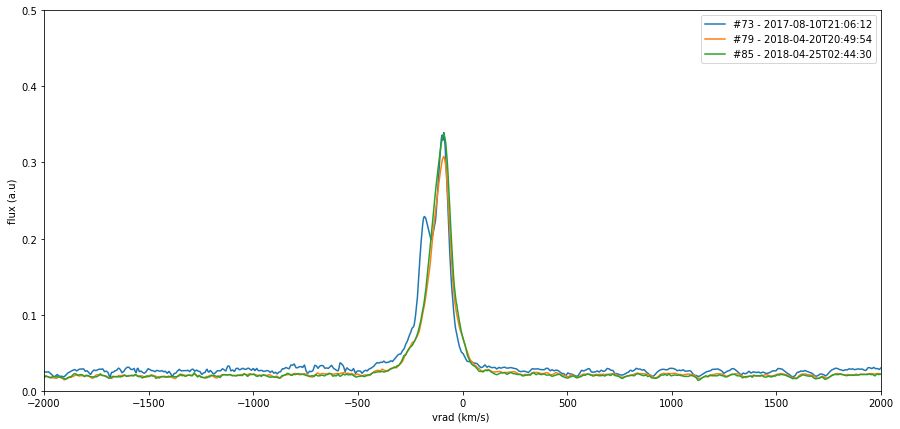

In [7]:
fig = pl.figure(1, figsize = (15, 7))

w_hbeta = 4861.
plot_line(73, w_hbeta, dobs=True)
plot_line(79, w_hbeta, dobs=True)
plot_line(85, w_hbeta, dobs=True)

pl.xlim(-2000, 2000)
pl.xlabel('vrad (km/s) ')
pl.ylim(0, 0.5)
pl.ylabel('flux (a.u)')
pl.legend()

#### Plot several lines from same observations

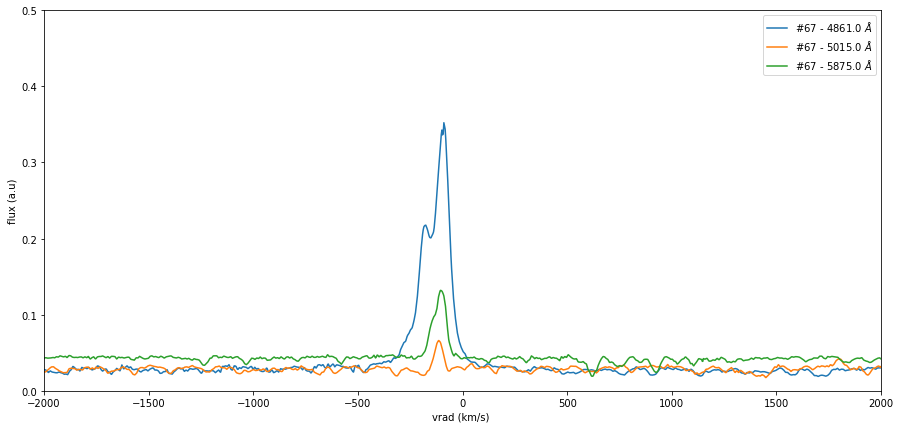

In [8]:
fig = pl.figure(2, figsize = (15, 7))

i_obs = 67
plot_line(i_obs, 4861., labwl=True)
plot_line(i_obs, 5015., labwl=True)
plot_line(i_obs, 5875, labwl=True)

pl.xlim(-2000, 2000)
pl.xlabel('vrad (km/s) ')
pl.ylim(0, 0.5)
pl.ylabel('flux (a.u)')
pl.legend()

In [9]:
# Convert the notebook to script
!jupyter nbconvert --to script ag_dra.ipynb
# Calculate requirements
!pipreqs . --force

[NbConvertApp] Converting notebook ag_dra.ipynb to script
[NbConvertApp] Writing 6269 bytes to ag_dra.py
INFO: Successfully saved requirements file in ./requirements.txt
